# TP3 A: Génération d'une fonction 1D avec un GAN
## Objectif

Dans ce TP, vous allez implémenter un GAN (Generative Adversarial Network) avec Keras et TensorFlow pour générer une fonction 1D. L'objectif est de comprendre les concepts de base des GANs et leur implémentation pratique.

## Prérequis

Python installé (>=3.7)

TensorFlow et Keras installés

Pour installer les dépendances nécessaires :

<code>pip install tensorflow numpy matplotlib<code>

## Introduction aux GANs

Un GAN se compose de deux réseaux neuronaux :

- Le générateur : Il produit des échantillons à partir de bruit aléatoire.

- Le discriminateur : Il distingue les échantillons réels des échantillons générés.

Ces deux réseaux s'entraînent en compétition, ce qui permet au générateur d'améliorer la qualité des échantillons produits.

## Partie 1 : Génération des données

Nous allons générer une fonction 1D simple comme nos données cibles. Par exemple, une sinusoïde.

Génération de la fonction cible :

In [ ]:
import os
import math
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

from IPython import display

import warnings
warnings.filterwarnings('ignore')

## Génération des données

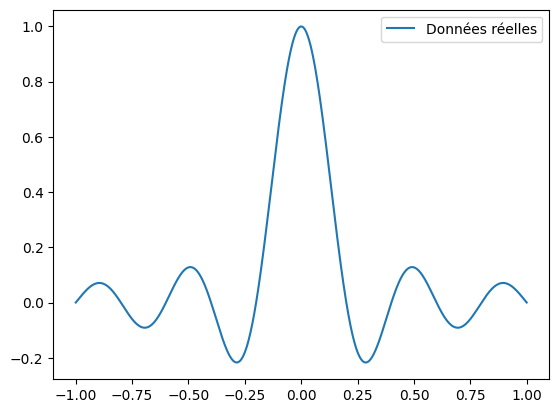

In [ ]:
# Génération des données cibles
def generate_real_data(samples=1000):
    x = np.linspace(-1, 1, samples)
    y = np.sin(5 * np.pi * x) / (5 * np.pi * x + 1e-8)  # Fonction sinusoïdale modifiée
    return x, y

# Visualisation
x, y = generate_real_data()
plt.plot(x, y, label="Données réelles")
plt.legend()
plt.show()


## Partie 2 : Construction du GAN
## Définition du generateur et descriminateur

In [ ]:
#Le générateur
#TODO completer la fonction generator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_generator(latent_dim):
    model = Sequential([
       #TODO
    ])
    return model

latent_dim = 5
generator = build_generator(latent_dim)
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#TODO completer la fonction generator
def build_discriminator():
    model = Sequential([
       #TODO
    ])
    return model

discriminator = build_discriminator()
discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
discriminator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 609 (2.38 KB)

 Trainable params: 609 (2.38 KB)

 Non-trainable params: 0 (0.00 B)

## Définition du network gan
Dans un modèle GAN, la ligne
<code> discriminator.trainable = False </code> est essentielle pour l'entraînement coordonné entre le générateur et le discriminateur.

Lorsque nous entraînons le GAN (le modèle combiné qui relie le générateur et le discriminateur), nous voulons que seul le générateur apprenne à améliorer ses sorties. Le discriminateur est utilisé uniquement pour fournir un signal de perte au générateur. Si les poids du discriminateur n'étaient pas gelés, ils seraient également mis à jour pendant cet entraînement, ce qui rendrait l'apprentissage incohérent.

Flux d'entraînement :

Étape 1 : Entraîner le discriminateur

  Le discriminateur apprend à distinguer les données réelles des données générées.
  
Ici, <code> discriminator.trainable = True</code>

Étape 2 : Entraîner le générateur via le GAN

Le générateur essaie de tromper le discriminateur.
Le discriminateur reste gelé (<code>discriminator.trainable = False</code>) pour que seules les mises à jour du générateur soient effectuées.

In [ ]:

def build_gan(generator,discriminator):

    discriminator.trainable = False
    gan_input = Input(shape=(latent_dim,))
    generated_output = generator(gan_input)
    gan_output = discriminator(generated_output)
    gan = Model(#TODO)
    gan.compile(optimizer=Adam(learning_rate=0.0002), loss=#TODO)
    return gan

gan = build_gan(generator, discriminator)


In [ ]:
gan.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 5)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 1)                   │             673 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 1)                   │             609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 609 (2.38 KB)

## Entrainement du modèle

In [ ]:
def generate_and_save_images(model, epoch, test_input, output):
    # génération et sauvgarde des l'images aux fur et à mesur des epochs

    #varifier si le folder existe sinon le créer
    if not os.path.exists(output):
        os.makedirs(output)

    #utiliser le générateur ou générer les données à partir du bruit
    predictions = model(test_input)

    # plot et save image
    fig = plt.figure(figsize=(4, 4))
    plt.plot(predictions, ".")
    plt.axis('off')
    plt.savefig(output+'image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()


In [ ]:
def train_gan(generator, discriminator, gan, latent_dim, epochs=1000, batch_size=32):

    losses_d = []
    losses_g = []
    for epoch in range(epochs):
        # Générer des données réelles
        x_real, y_real = generate_real_data(batch_size)
        x_real = y_real.reshape(-1, 1)
        y_real_label = np.ones((batch_size, 1))

        # Générer des données synthétiques
        x_fake = np.random.randn(batch_size, latent_dim)
        y_fake = generator.predict(x_fake)
        y_fake_label = np.zeros((batch_size, 1))

        # Entraîner le discriminateur
        discriminator.trainable = True
        d_loss_real = #TODO
        d_loss_fake = #TODO
        d_loss = #TODO

        # Entraîner le générateur
        discriminator.trainable = False
        z = np.random.randn(batch_size, latent_dim)
        g_loss = gan.train_on_batch(z, np.ones((batch_size, 1)))
        display.clear_output(wait=True)
        generate_and_save_images(
            generator,
            epoch + 1,
            seed,
            'tf_1D/img_output/'
        )
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: [D loss: {d_loss[0]}] [G loss: {g_loss}]")


Lancement de l'entraînement

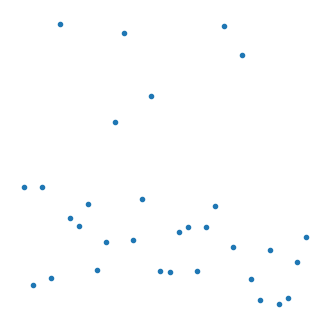

In [ ]:
batch_size=32
seed = np.random.randn(batch_size, latent_dim)
train_gan(generator, discriminator, gan, latent_dim, epochs=500, batch_size=batch_size)

## Partie 4 : Visualisation des résultats

Génération de nouvelles données :

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


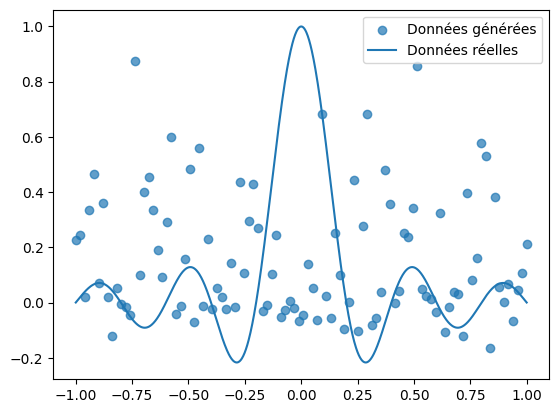

In [ ]:

z = np.random.randn(100, latent_dim)
generated_data = generator.predict(z)
plt.scatter(np.linspace(-1, 1, 100), generated_data, label="Données générées", alpha=0.7)
x, y = generate_real_data()
plt.plot(x, y, label="Données réelles")
plt.legend()
plt.show()

We can use the following function to visualize the embedding layer.

In [ ]:
!pip install git+https://github.com/tensorflow/docs

In [ ]:
import tensorflow_docs.vis.embed as embed
import imageio
import glob

anim_file = 'tf_1D/sinus_gan.gif'

with imageio.get_writer(anim_file, mode='I', duration = 0.05) as writer:
    filenames = glob.glob('tf_1D/img_output/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

<ipython-input-1-781da284f391>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-1-781da284f391>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



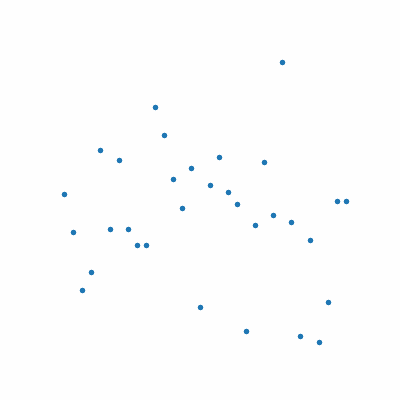

In [ ]:
embed.embed_file(anim_file)

### Modifier le modèle actuelle
Quelle est ton conclusion en regardant la performance?
Quelle sont les améliorations possibles?
Créer un autre modèle GAN qui est plus performant que celui proposé dans le TP

In [ ]:
#TODO

## Conclusion

Ce TP vous a permis de comprendre le fonctionnement et l'entraînement d'un GAN simple pour générer une fonction 1D. Vous pouvez étendre ce modèle à des données plus complexes ou à des dimensions supérieures.

